#Import libraries and settings

In [1]:
from constants import *
from data_preprocessing import *
from LSTM_model import *
from train import *

In [2]:
from matplotlib import pylab as plt
plt.rcParams['font.family'] = 'DejaVu Serif'
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['lines.markersize'] = 12
plt.rcParams['xtick.labelsize'] = 24
plt.rcParams['ytick.labelsize'] = 24
plt.rcParams['legend.fontsize'] = 24
plt.rcParams['axes.titlesize'] = 28
plt.rcParams['axes.labelsize'] = 24

Dataset is daily maximum precipitation on USA territory from 2015.02.01 to 2018.02.01

Grid size is approximatelly 11 km

In [3]:
np_dataset = np.load('data/USA_Water_dataset.npy')

In [4]:
np_dataset.shape

(1116, 24, 64)

In [5]:
X_train, y_train= multivariate_data(np_dataset, np_dataset, start_index = 0, end_index = 1000, history_size = TRAIN_SIZE, target_size = PREDICT_SIZE, step = 1)
X_test, y_test= multivariate_data(np_dataset, np_dataset, start_index = 801, end_index = 1100, history_size = TRAIN_SIZE, target_size = PREDICT_SIZE, step = 1)

In [6]:
dataset_train = DS(X_train,y_train)
dataset_test = DS(X_test,y_test)

In [7]:
model  = LSTM_Block(INPUT_SIZE,HIDDEN_SIZE,LSTM_NUM_LAYERS ,PREDICT_SIZE, IMAGE_SHAPE).to(DEVICE)

In [8]:

errors = {'test' : [], 'train': []}
train_model(model, dataset_train,dataset_test, errors, initial_lr  = INITIAL_LR, batch_size =BATCH_SIZE, max_epochs = MAX_EPOCHS  )

Epoch 1 of 25


C:\Users\sd\Anaconda2\envs\notebook\lib\site-packages\torch\nn\functional.py:3454: UserWarning: Default upsampling behavior when mode=bilinear is changed to align_corners=False since 0.4.0. Please specify align_corners=True if the old behavior is desired. See the documentation of nn.Upsample for details.
  warnings.warn(


Validation metrics: 
{'loss': 0.3532959509066783}
Best model yet, saving
Epoch 2 of 25


C:\Users\sd\Anaconda2\envs\notebook\lib\site-packages\torch\optim\lr_scheduler.py:154: UserWarning: The epoch parameter in `scheduler.step()` was not necessary and is being deprecated where possible. Please use `scheduler.step()` to step the scheduler. During the deprecation, if epoch is different from None, the closed form is used instead of the new chainable form, where available. Please open an issue if you are unable to replicate your use case: https://github.com/pytorch/pytorch/issues/new/choose.
  warnings.warn(EPOCH_DEPRECATION_WARNING, UserWarning)


Validation metrics: 
{'loss': 0.3503667257165396}
Best model yet, saving
Epoch 3 of 25
Validation metrics: 
{'loss': 0.34864209202455365}
Best model yet, saving
Epoch 4 of 25
Validation metrics: 
{'loss': 0.34852560532135773}
Best model yet, saving
Epoch 5 of 25
Validation metrics: 
{'loss': 0.34795397925975075}
Best model yet, saving
Epoch 6 of 25
Validation metrics: 
{'loss': 0.3460758304937766}
Best model yet, saving
Epoch 7 of 25
Validation metrics: 
{'loss': 0.3442059520324926}
Best model yet, saving
Epoch 8 of 25
Validation metrics: 
{'loss': 0.34286728127455623}
Best model yet, saving
Epoch 9 of 25
Validation metrics: 
{'loss': 0.34121687608807744}
Best model yet, saving
Epoch 10 of 25
Validation metrics: 
{'loss': 0.34074464493754947}
Best model yet, saving
Epoch 11 of 25
Validation metrics: 
{'loss': 0.33987241406594554}
Best model yet, saving
Epoch 12 of 25
Validation metrics: 
{'loss': 0.3386543993454253}
Best model yet, saving
Epoch 13 of 25
Validation metrics: 
{'loss': 0.

#Model predictions

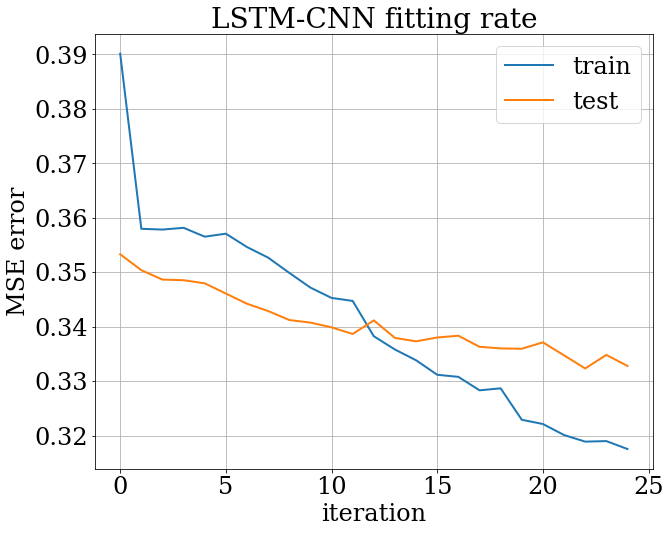

In [9]:
#draw only with errors from training
plt.figure(figsize =(10,8))
plt.plot(errors['train'], label = 'train')
plt.plot(errors['test'], label = 'test')
plt.xlabel('iteration')
plt.ylabel('MSE error')
plt.title('LSTM-CNN fitting rate')
plt.legend()
plt.grid()
plt.show()

Depict predictions and originals

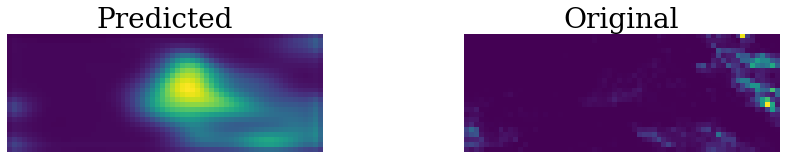

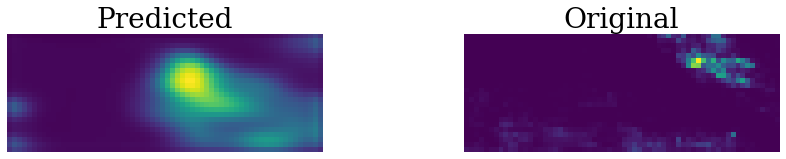

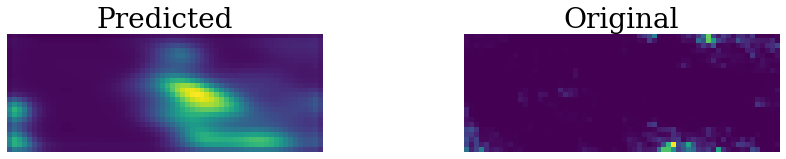

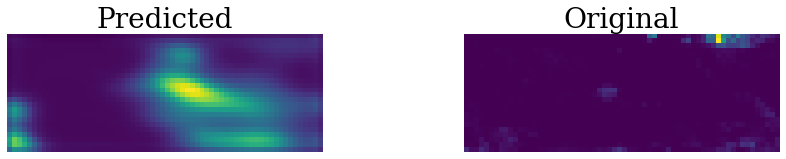

In [10]:
N = 4
for i in range(N):
    index = np.random.randint(200,210)
    y = model(torch.Tensor(X_test[index:index+1,:,:,:]).to(DEVICE))
    y = y.cpu().detach().numpy().squeeze()

    plt.figure(figsize = (15,10))
    plt.subplot(N,2,2*i+1)
    plt.imshow(y[2])
    plt.title('Predicted')
    plt.axis('off')
    plt.subplot(N,2,2*i+2)
    plt.imshow(y_test[index][2])
    plt.title('Original')
    plt.axis('off')
    plt.show()